## 1. Titanic Dataset


In [ ]:
import kagglehub

path = kagglehub.dataset_download("ibrahimelsayed182/titanic-dataset")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('dataset/Titanic.csv')
 
print(titanic.head(10))

      sex   age  sibsp  parch     fare embarked   class    who  alone  \
0    male  22.0      1      0   7.2500        S   Third    man  False   
1  female  38.0      1      0  71.2833        C   First  woman  False   
2  female  26.0      0      0   7.9250        S   Third  woman   True   
3  female  35.0      1      0  53.1000        S   First  woman  False   
4    male  35.0      0      0   8.0500        S   Third    man   True   
5    male   NaN      0      0   8.4583        Q   Third    man   True   
6    male  54.0      0      0  51.8625        S   First    man   True   
7    male   2.0      3      1  21.0750        S   Third  child  False   
8  female  27.0      0      2  11.1333        S   Third  woman  False   
9  female  14.0      1      0  30.0708        C  Second  child  False   

   survived  
0         0  
1         1  
2         1  
3         1  
4         0  
5         0  
6         0  
7         0  
8         1  
9         1  


In [6]:
print(len(titanic.index))

891


### Analyzing Dataset

<Axes: xlabel='survived', ylabel='count'>

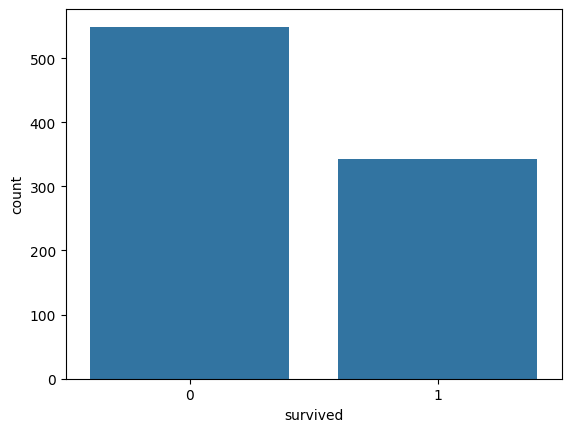

In [7]:
sns.countplot(x='survived', data=titanic)


<Axes: xlabel='survived', ylabel='count'>

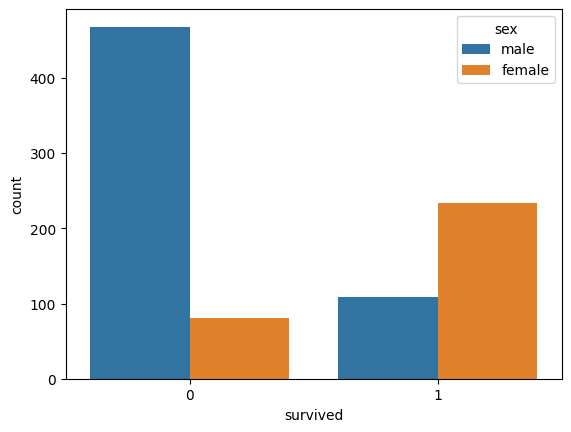

In [8]:
sns.countplot(x= 'survived', hue='sex', data=titanic)

<Axes: xlabel='sex', ylabel='count'>

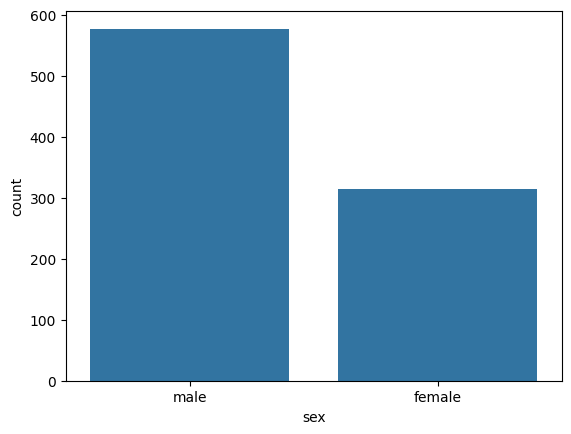

In [9]:
sns.countplot(x='sex', data=titanic)

<Axes: xlabel='survived', ylabel='count'>

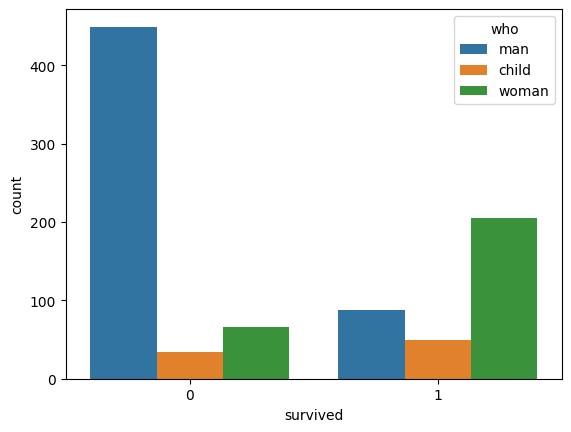

In [10]:
sns.countplot(x='survived', hue='who', data=titanic)

<Axes: xlabel='survived', ylabel='count'>

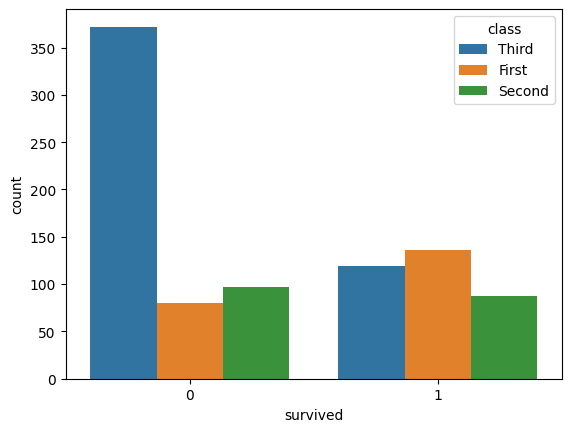

In [11]:
sns.countplot(x='survived', hue='class', data=titanic)

<Axes: xlabel='survived', ylabel='count'>

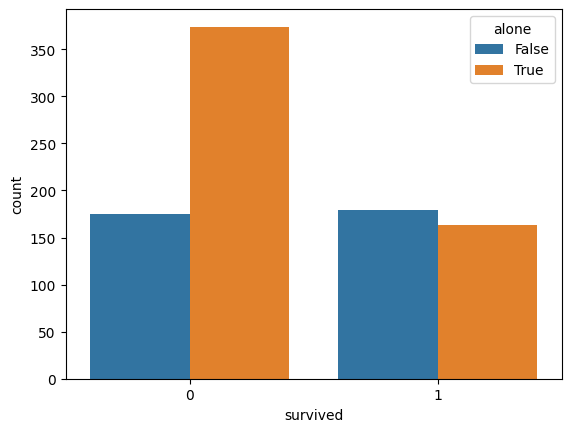

In [12]:
sns.countplot(x='survived', hue='alone', data=titanic)

<Axes: xlabel='alone', ylabel='count'>

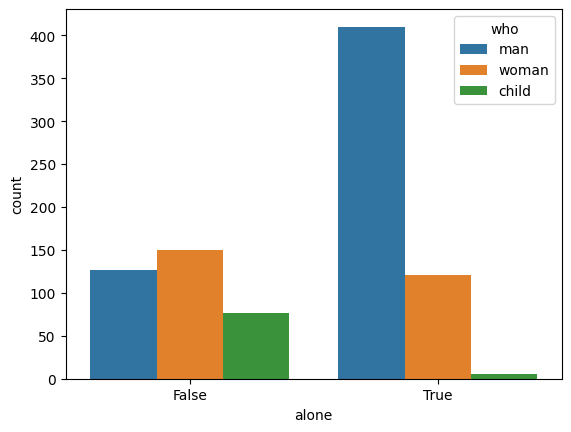

In [13]:
sns.countplot(x='alone', hue='who', data=titanic)

<Axes: xlabel='survived', ylabel='count'>

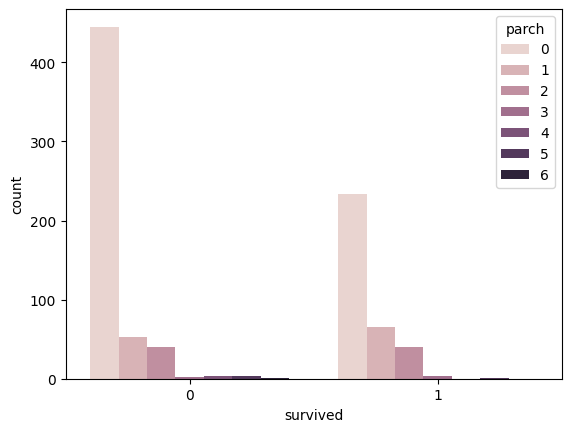

In [14]:
sns.countplot(x='survived', hue='parch', data=titanic)

### Data Cleaning

In [15]:
print(titanic.isnull().sum())

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64


<Axes: >

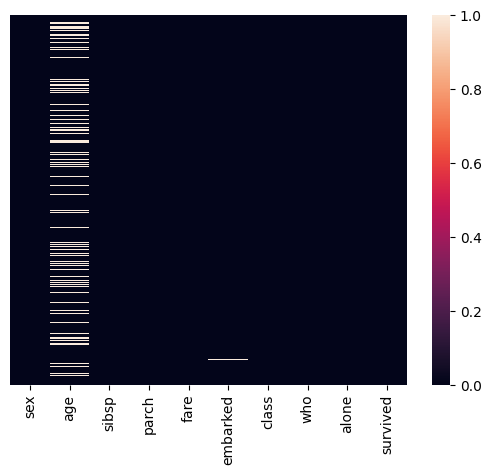

In [16]:
sns.heatmap(titanic.isnull(), yticklabels=False)

<Axes: xlabel='class', ylabel='age'>

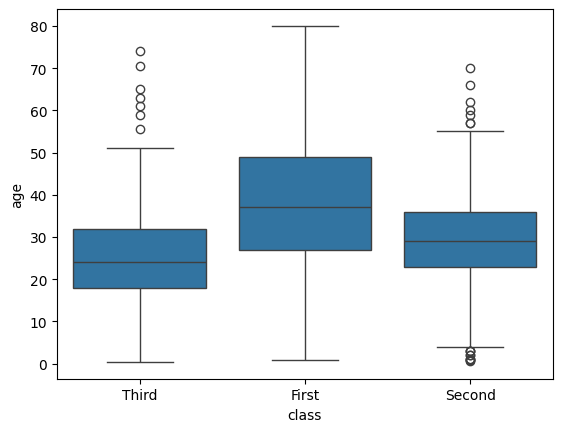

In [17]:
sns.boxplot(x='class', y='age', data=titanic)

In [18]:
titanic.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [19]:
titanic.dropna(inplace=True)

<Axes: >

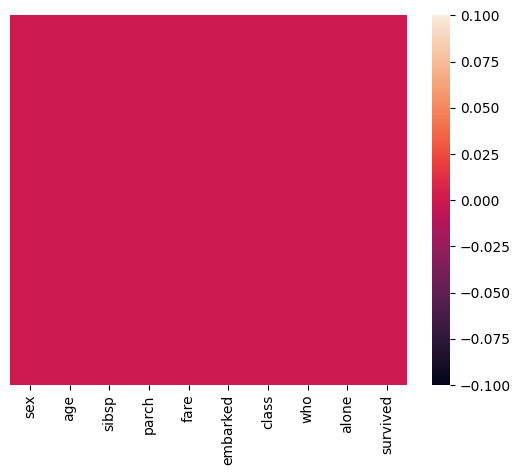

In [20]:
sns.heatmap(titanic.isnull(), yticklabels=False)

In [21]:
print(len(titanic.index))

712


In [22]:
titanic['sex'] = pd.get_dummies(titanic['sex'], drop_first=True)
titanic.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,True,22.0,1,0,7.2500,S,Third,man,False,0
1,False,38.0,1,0,71.2833,C,First,woman,False,1
2,False,26.0,0,0,7.9250,S,Third,woman,True,1
3,False,35.0,1,0,53.1000,S,First,woman,False,1
4,True,35.0,0,0,8.0500,S,Third,man,True,0


In [23]:
who = pd.get_dummies(titanic['who'], drop_first=True)
print(who)

       man  woman
0     True  False
1    False   True
2    False   True
3    False   True
4     True  False
..     ...    ...
885  False   True
886   True  False
887  False   True
889   True  False
890   True  False

[712 rows x 2 columns]


In [24]:
cls = pd.get_dummies(titanic['class'], drop_first=True)
print(cls)

     Second  Third
0     False   True
1     False  False
2     False   True
3     False  False
4     False   True
..      ...    ...
885   False   True
886    True  False
887   False  False
889   False  False
890   False   True

[712 rows x 2 columns]


In [25]:
embarked = pd.get_dummies(titanic['embarked'], drop_first=True)
print(embarked)

         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
885   True  False
886  False   True
887  False   True
889  False  False
890   True  False

[712 rows x 2 columns]


In [26]:
titanic = pd.concat([titanic, embarked, who, cls], axis=1)

In [27]:
titanic.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,Q,S,man,woman,Second,Third
0,True,22.0,1,0,7.2500,S,Third,man,False,0,False,True,True,False,False,True
1,False,38.0,1,0,71.2833,C,First,woman,False,1,False,False,False,True,False,False
2,False,26.0,0,0,7.9250,S,Third,woman,True,1,False,True,False,True,False,True
3,False,35.0,1,0,53.1000,S,First,woman,False,1,False,True,False,True,False,False
4,True,35.0,0,0,8.0500,S,Third,man,True,0,False,True,True,False,False,True


In [28]:
titanic.drop(['embarked','class','who'], axis=1, inplace=True)

In [29]:
titanic.head()

,sex,age,sibsp,parch,fare,alone,survived,Q,S,man,woman,Second,Third
0,True,22.0,1,0,7.2500,False,0,False,True,True,False,False,True
1,False,38.0,1,0,71.2833,False,1,False,False,False,True,False,False
2,False,26.0,0,0,7.9250,True,1,False,True,False,True,False,True
3,False,35.0,1,0,53.1000,False,1,False,True,False,True,False,False
4,True,35.0,0,0,8.0500,True,0,False,True,True,False,False,True


### Train Model

In [30]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [31]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(X_train, y_train)

C:\Users\SCENTECH SERVICES\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Test Model

In [47]:
predictions = logmodel.predict(X_test)

### Accuracy

In [48]:
from sklearn.metrics import classification_report

In [49]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.83      0.84       126\n           1       0.76      0.77      0.77        88\n\n    accuracy                           0.81       214\n   macro avg       0.80      0.80      0.80       214\nweighted avg       0.81      0.81      0.81       214\n'

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, predictions)

array([[105,  21],
       [ 20,  68]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, predictions)

0.8084112149532711

## 2. Spam Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

C:\Users\SCENTECH SERVICES\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.86M/1.86M [00:01<00:00, 1.26MB/s]

Extracting files...
Path to dataset files: C:\Users\SCENTECH SERVICES\.cache\kagglehub\datasets\venky73\spam-mails-dataset\versions\1


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spam_dataset = pd.read_csv('dataset/spam_ham_dataset.csv')

### Analyzing Data

In [66]:
spam_dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


<Axes: xlabel='label', ylabel='count'>

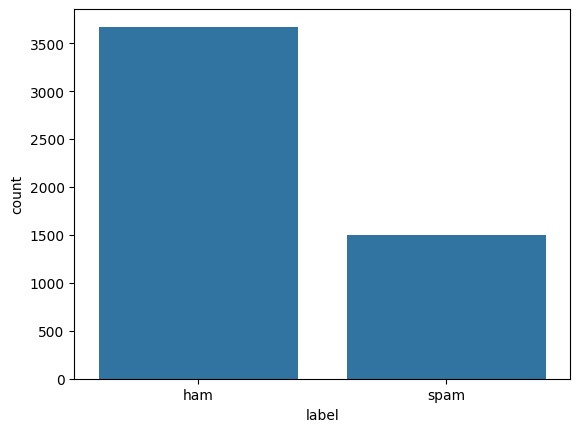

In [67]:
sns.countplot(x='label', data=spam_dataset)

<Axes: xlabel='label', ylabel='label_num'>

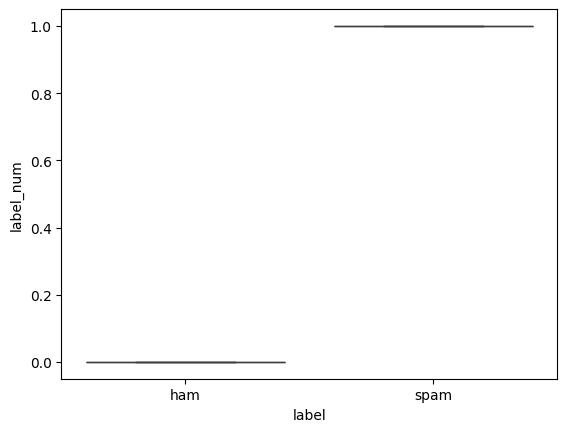

In [68]:
sns.boxplot(x='label', y='label_num', data=spam_dataset)

In [104]:
spam_dataset.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

### Train Model

In [105]:
X = spam_dataset['text']
y = spam_dataset['label_num']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [108]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [109]:
classifier = MultinomialNB()

In [110]:
classifier.fit(X_train, y_train)

MultinomialNB()

### Test Model

In [111]:
predictions = classifier.predict(X_test)

### Accuracy

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98      1121\n           1       0.96      0.95      0.95       431\n\n    accuracy                           0.97      1552\n   macro avg       0.97      0.97      0.97      1552\nweighted avg       0.97      0.97      0.97      1552\n'

In [114]:
confusion_matrix(y_test, predictions)

array([[1103,   18],
       [  21,  410]], dtype=int64)

In [115]:
accuracy_score(y_test, predictions)

0.9748711340206185